In [1]:
# Introduction to Machine Learning
# Algorithms, models tat help the computer to learn and predict
# applications of machine learning
"""
1. Image processing
2. Speech Recognition
3. FRaud detection

Approaches to Machine Learning
1. Supervised Learning; Dataset that is labelled , predict, linear regression,decision trees, support vector machine, nuetral networks( supervised learning algorithm)
2. Unsupervised Learning; Dataset that is unlabelled, clustering algorithms to group data together.k-means clustering, hierarchical clustering, PCA clustering(Pinciple Component Analysis)
3. Reinforcement Learning

# Problem Fomulation
1.Define the problem, classificationtask, regression analysis,clustering, anomally detection recommendations
2. gather the data\
3.split the data

# Difference between ML and DL
ML learn and make predictions while DL understand the training of the models(recognition)- subset of deep learning

ethics of ML
1. fairness and baisness
2. Transparency
3. Accountability
4. Privacy

data types
1. Numerical data- this data can be discrete(integers) or continuous(infinite values)
2. categorical data- cannot be measured against each other
3. ordinal data- measure against each other

"""

'\n1. Image processing\n2. Speech Recognition\n3. FRaud detection\n\nApproaches to Machine Learning\n1. Supervised Learning; Dataset that is labelled , predict, linear regression,decision trees, support vector machine, nuetral networks( supervised learning algorithm)\n2. Unsupervised Learning; Dataset that is unlabelled, clustering algorithms to group data together.k-means clustering, hierarchical clustering, PCA clustering(Pinciple Component Analysis)\n3. Reinforcement Learning\n\n# Problem Fomulation\n1.Define the problem, classificationtask, regression analysis,clustering, anomally detection recommendations\n2. gather the data3.split the data\n\n# Difference between ML and DL\nML learn and make predictions while DL understand the training of the models(recognition)- subset of deep learning\n\nethics of ML\n1. fairness and baisness\n2. Transparency\n3. Accountability\n4. Privacy\n\ndata types\n1. Numerical data- this data can be discrete(integers) or continuous(infinite values)\n2. c

In [2]:
import numpy as np # linearalgebra
import pandas  #dataprocessing, CSV file(pd.read csv)
import matplotlib.pyplot as plt #plotting , data visualisation
import seaborn as sn # stastical data visualisation
%matplotlib inline

# ML for Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Control display
pandas.options.display.max_columns=50
sn.set(style="darkgrid", rc={'axes.facecolor':'#CAFFED'})
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load / read 
import pandas as pd
df = pd.read_csv("heart_disease.csv")
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
"""
__summary
cp= chest pain
trestbps= resting blood pressure
chol= cholesterol
fbs= fasting blood pressure
restecg= resting electrocardiography
exang= exercise induced agina
oldpeak= ST depression induced
slope= the slope of the peak exercise
ca= number of major vessel
thal= normal, flexied defect, reversible defect
target= have disease or not(1=yes, 0=no)
"""

In [5]:
# show the number of people with heart disease
# Column target
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [6]:
# Show percentage of male and female
count_female = len(df[df.sex == 0])
count_male = len(df[df.sex == 1])
# Show output
print('Percentage of Female Patients: {:.2f}%'.format(count_female/(len(df.sex))*100))

Percentage of Female Patients: 30.44%


In [7]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


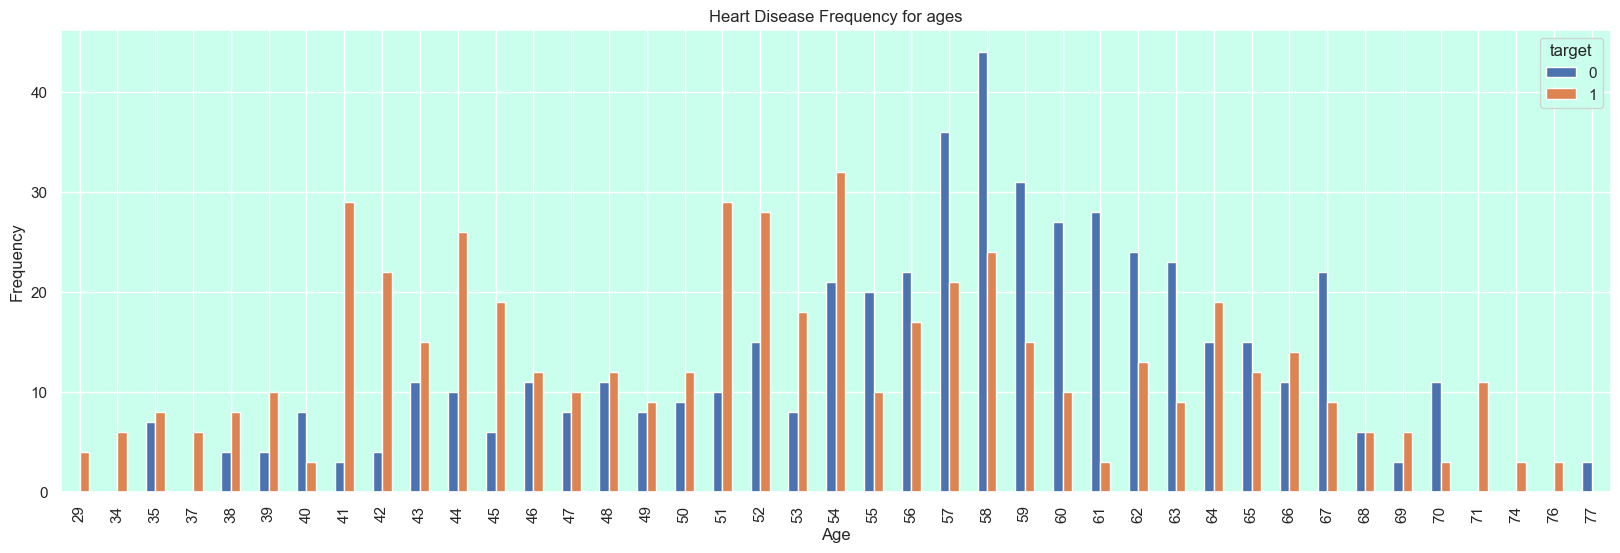

In [8]:
# Barplot showing heart disease frequency of age
import matplotlib.pyplot as plt
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(20,6))
plt.title('Heart Disease Frequency for ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

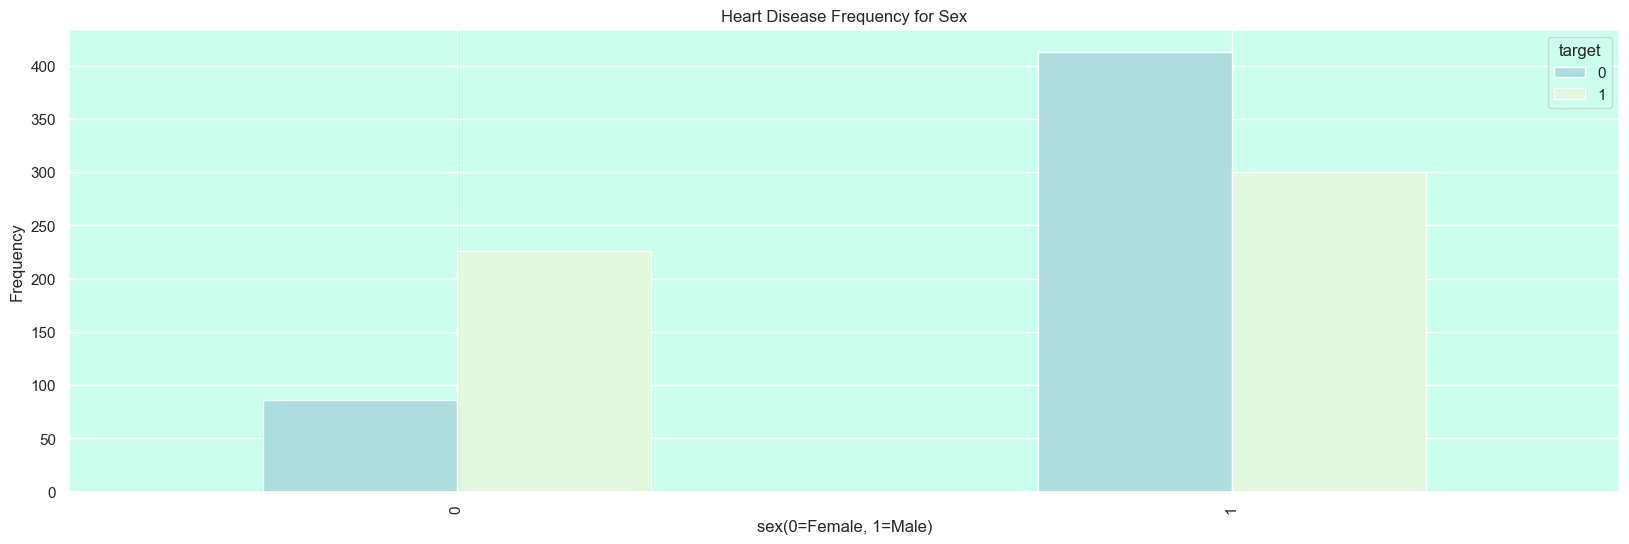

In [9]:
# Data Visualisation for Heart Diseae frequency for sex
pd.crosstab(df.sex,df.target).plot(kind='bar', figsize=(20,6), color=['#ACDDDE','#E1F8DC'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('sex(0=Female, 1=Male)')
plt.ylabel('Frequency')
plt.show()

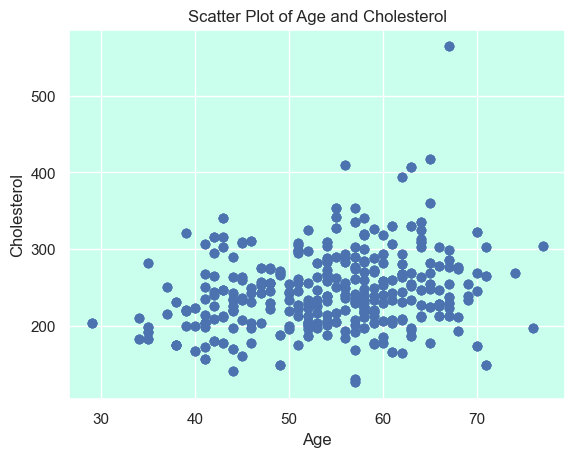

In [10]:
# Scatter plot
plt.scatter(df.age, df.chol)
plt.title('Scatter Plot of Age and Cholesterol')
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

In [ ]:
# Working with ML model Accuracy of different ML more 
# Create model for logical regression
# Solve problems based on classification. create independent variables and dependent variables
# categorical prediction


In [11]:
# creating a model for logistic regression
y = df.target.values
x_data = df.drop(['target'],axis=1)

In [12]:
# Normalise the data (Split the data into training and testing)
# 80% of the training data 20% of the testing data
#Normalise the data X=(X-Xmin)/(Xmax-Xmin)

import numpy as np
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [13]:
# Split the data into 67% training 33% testing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=0)


In [14]:
# Check shape of data remaining after splitting for training and testing
x_train.shape, x_test.shape

((686, 13), (339, 13))

In [15]:
# Check the datatype
x_train.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
dtype: object

In [16]:
# check x_train header
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
824,0.108156,0.001773,0.000000,0.244681,0.294326,0.0,0.000000,0.221631,0.001773,0.006383,0.001773,0.001773,0.003546
263,0.097518,0.000000,0.001773,0.234043,0.606383,0.0,0.001773,0.294326,0.000000,0.002128,0.003546,0.000000,0.003546
827,0.101064,0.001773,0.003546,0.226950,0.406028,0.0,0.000000,0.265957,0.000000,0.000709,0.001773,0.001773,0.005319
828,0.078014,0.001773,0.003546,0.230496,0.413121,0.0,0.001773,0.317376,0.001773,0.000709,0.003546,0.000000,0.003546
634,0.092199,0.001773,0.000000,0.221631,0.375887,0.0,0.001773,0.297872,0.000000,0.001773,0.003546,0.003546,0.005319


In [18]:
# Transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [17]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
clf_gini= DecisionTreeClassifier(criterion="gini",max_depth=3, random_state=0)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [19]:
# Predict the class label for the test data using the classifier
y_pred_gini = clf_gini.predict(x_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index:{0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

                    

Model accuracy score with criterion gini index:0.8378


In [20]:
# Predict the class label for training data using decion tree classifier
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
# print the training set of accuracy score
print('Training-set accuracy score: {0:0.4f}'.format(clf_gini.score(x_train, y_train)))
print('Testing-set accuracy score: {0:0.4f}'.format(clf_gini.score(x_test, y_test)))

Training-set accuracy score: 0.8513
Testing-set accuracy score: 0.8378


[Text(0.5, 0.875, 'x[2] <= 0.001\ngini = 0.5\nsamples = 686\nvalue = [341, 345]'),
 Text(0.25, 0.625, 'x[11] <= 0.001\ngini = 0.369\nsamples = 332\nvalue = [251, 81]'),
 Text(0.125, 0.375, 'x[12] <= 0.004\ngini = 0.5\nsamples = 144\nvalue = [74, 70]'),
 Text(0.0625, 0.125, 'gini = 0.381\nsamples = 82\nvalue = [21, 61]'),
 Text(0.1875, 0.125, 'gini = 0.248\nsamples = 62\nvalue = [53, 9]'),
 Text(0.375, 0.375, 'x[3] <= 0.193\ngini = 0.11\nsamples = 188\nvalue = [177, 11]'),
 Text(0.3125, 0.125, 'gini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.4375, 0.125, 'gini = 0.076\nsamples = 177\nvalue = [170, 7]'),
 Text(0.75, 0.625, 'x[0] <= 0.1\ngini = 0.379\nsamples = 354\nvalue = [90, 264]'),
 Text(0.625, 0.375, 'x[9] <= 0.006\ngini = 0.212\nsamples = 216\nvalue = [26, 190]'),
 Text(0.5625, 0.125, 'gini = 0.179\nsamples = 211\nvalue = [21, 190]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.875, 0.375, 'x[1] <= 0.001\ngini = 0.497\nsamples = 138\nvalue = [64, 

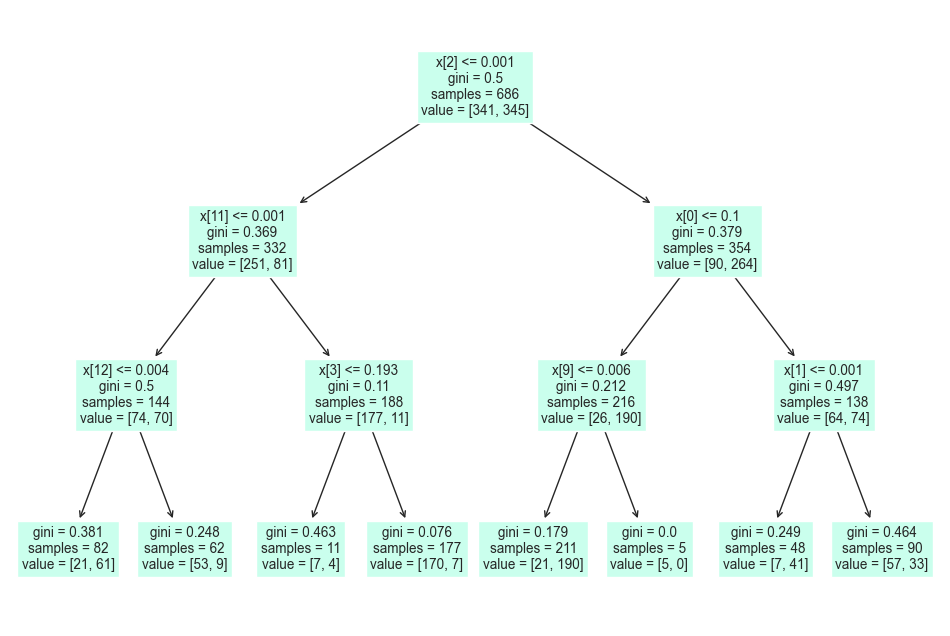

In [22]:
# 1st way to visualize decision tree leaf node
plt.figure(figsize=(12,8)) # width and height of figure
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train))



In [ ]:
# visualisation of decision tree
import graphviz
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

# load data
heart_data = pd.read_csv('heart_disease.csv')
y = heart_data['target'].values
x_data = heart_data.drop(['target'],axis=1)

# train the decison tree classifier 
model = tree.DecisionTreeClassifier()
model.fit(x_data,y)

# get the class name of the dataset
class_names = heart_data['target'].unique().astype(str)

# generate the graphviz visualization
tree.export_graphviz(model, out_file='heart_disease1.dot', feature_names=x_data.columns,class_names=class_names,
                     label='all',filled=True,rounded=True)